In [84]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
a = pd.read_csv('YES.csv', parse_dates=["Date"], index_col= "Date") 
# changing datatype of dates and making dates column as index column

ValueError: 'Date' is not in list

In [36]:
from statsmodels.tsa.arima_model import ARIMA   

In [37]:
from datetime import datetime

In [44]:
a.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,195.899994,197.199997,181.250000,185.600006,180.638336,66597684.0
2019-02-04,184.250000,184.699997,175.600006,179.800003,174.993393,60771732.0
2019-02-05,179.800003,183.500000,175.000000,176.100006,171.392303,44477885.0
2019-02-06,178.899994,178.949997,173.000000,176.449997,171.732956,45391450.0
2019-02-07,177.100006,181.800003,175.250000,176.949997,172.219574,44494971.0


In [39]:
type(a.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [40]:
index_col= "Date"

In [45]:
a

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-01,195.899994,197.199997,181.250000,185.600006,180.638336,66597684.0
2019-02-04,184.250000,184.699997,175.600006,179.800003,174.993393,60771732.0
2019-02-05,179.800003,183.500000,175.000000,176.100006,171.392303,44477885.0
2019-02-06,178.899994,178.949997,173.000000,176.449997,171.732956,45391450.0
2019-02-07,177.100006,181.800003,175.250000,176.949997,172.219574,44494971.0
2019-02-08,177.000000,178.500000,173.250000,175.100006,170.419052,32561739.0
2019-02-11,175.100006,176.000000,170.100006,173.250000,168.618484,29509227.0
2019-02-12,173.000000,176.250000,172.100006,172.649994,168.034515,22298518.0
2019-02-14,186.350006,224.000000,186.350006,221.250000,215.335297,264725005.0


In [46]:
a["2019-12"]                  # for a particular time period

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,69.000000,69.300003,63.049999,64.050003,64.050003,361756071.0
2019-12-03,64.099998,65.250000,59.000000,59.500000,59.500000,297142445.0
2019-12-04,58.549999,63.450001,56.650002,63.000000,63.000000,340845428.0
2019-12-05,63.000000,64.000000,60.849998,62.099998,62.099998,224990595.0
2019-12-06,60.099998,60.750000,55.150002,56.000000,56.000000,282441286.0
2019-12-09,56.000000,58.849998,53.750000,56.250000,56.250000,314839590.0
2019-12-10,54.799999,56.349998,48.549999,50.549999,50.549999,345518744.0
2019-12-11,47.250000,49.400002,40.750000,42.799999,42.799999,661012673.0
2019-12-12,43.150002,48.799999,42.799999,45.349998,45.349998,398199436.0


In [47]:
a["2019-12"].Close.mean()    # finding mean

51.452381142857135

In [48]:
a["2019-12-01":"2019-12-07"]       # data in a given range

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,69.000000,69.300003,63.049999,64.050003,64.050003,361756071.0
2019-12-03,64.099998,65.250000,59.000000,59.500000,59.500000,297142445.0
2019-12-04,58.549999,63.450001,56.650002,63.000000,63.000000,340845428.0
2019-12-05,63.000000,64.000000,60.849998,62.099998,62.099998,224990595.0
2019-12-06,60.099998,60.750000,55.150002,56.000000,56.000000,282441286.0


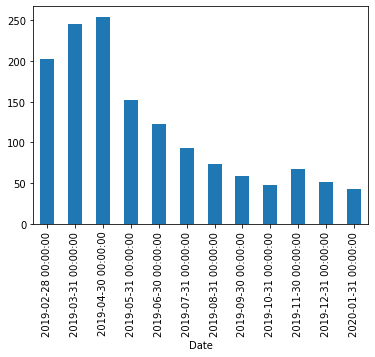

In [70]:
%matplotlib inline               
a.Close.resample('M').mean().plot(kind='bar')     # resampling and mean of different time period M for months and W for weeks and matlotlib inline for graphical representation

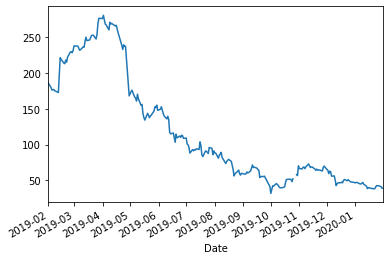

In [71]:
a.Close.plot()                  # for daily basis

In [52]:
a['priv day price'] = a['Close'].shift(1)        # for shifting the values up or down
a

,Open,High,Low,Close,Adj Close,Volume,priv day price
Date,,,,,,,
2019-02-01,195.899994,197.199997,181.250000,185.600006,180.638336,66597684.0,NaN
2019-02-04,184.250000,184.699997,175.600006,179.800003,174.993393,60771732.0,185.600006
2019-02-05,179.800003,183.500000,175.000000,176.100006,171.392303,44477885.0,179.800003
2019-02-06,178.899994,178.949997,173.000000,176.449997,171.732956,45391450.0,176.100006
2019-02-07,177.100006,181.800003,175.250000,176.949997,172.219574,44494971.0,176.449997
2019-02-08,177.000000,178.500000,173.250000,175.100006,170.419052,32561739.0,176.949997
2019-02-11,175.100006,176.000000,170.100006,173.250000,168.618484,29509227.0,175.100006
2019-02-12,173.000000,176.250000,172.100006,172.649994,168.034515,22298518.0,173.250000
2019-02-14,186.350006,224.000000,186.350006,221.250000,215.335297,264725005.0,172.649994


In [72]:
a['differnce bw two days'] = a['Close'] - a['priv day price']

In [73]:
a

,Open,High,Low,Close,Adj Close,Volume,priv day price,differnce bw two days,Ticks,Rolling Mean
Date,,,,,,,,,,
2019-02-01,195.899994,197.199997,181.250000,185.600006,180.638336,66597684.0,NaN,NaN,0,NaN
2019-02-04,184.250000,184.699997,175.600006,179.800003,174.993393,60771732.0,185.600006,-5.800003,1,NaN
2019-02-05,179.800003,183.500000,175.000000,176.100006,171.392303,44477885.0,179.800003,-3.699997,2,NaN
2019-02-06,178.899994,178.949997,173.000000,176.449997,171.732956,45391450.0,176.100006,0.349991,3,NaN
2019-02-07,177.100006,181.800003,175.250000,176.949997,172.219574,44494971.0,176.449997,0.500000,4,NaN
2019-02-08,177.000000,178.500000,173.250000,175.100006,170.419052,32561739.0,176.949997,-1.849991,5,NaN
2019-02-11,175.100006,176.000000,170.100006,173.250000,168.618484,29509227.0,175.100006,-1.850006,6,NaN
2019-02-12,173.000000,176.250000,172.100006,172.649994,168.034515,22298518.0,173.250000,-0.600006,7,NaN
2019-02-14,186.350006,224.000000,186.350006,221.250000,215.335297,264725005.0,172.649994,48.600006,8,NaN


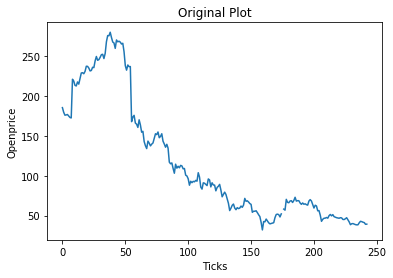

In [78]:
a['Ticks'] = range(0,len(a.index.values))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Openprice')
ax1.set_title('Original Plot')
ax1.plot('Ticks','Close', data = a );

In [79]:
a['Rolling Mean'] = a['Open'].rolling(window = 15).mean()

In [80]:
a

,Open,High,Low,Close,Adj Close,Volume,priv day price,differnce bw two days,Ticks,Rolling Mean
Date,,,,,,,,,,
2019-02-01,195.899994,197.199997,181.250000,185.600006,180.638336,66597684.0,NaN,NaN,0,NaN
2019-02-04,184.250000,184.699997,175.600006,179.800003,174.993393,60771732.0,185.600006,-5.800003,1,NaN
2019-02-05,179.800003,183.500000,175.000000,176.100006,171.392303,44477885.0,179.800003,-3.699997,2,NaN
2019-02-06,178.899994,178.949997,173.000000,176.449997,171.732956,45391450.0,176.100006,0.349991,3,NaN
2019-02-07,177.100006,181.800003,175.250000,176.949997,172.219574,44494971.0,176.449997,0.500000,4,NaN
2019-02-08,177.000000,178.500000,173.250000,175.100006,170.419052,32561739.0,176.949997,-1.849991,5,NaN
2019-02-11,175.100006,176.000000,170.100006,173.250000,168.618484,29509227.0,175.100006,-1.850006,6,NaN
2019-02-12,173.000000,176.250000,172.100006,172.649994,168.034515,22298518.0,173.250000,-0.600006,7,NaN
2019-02-14,186.350006,224.000000,186.350006,221.250000,215.335297,264725005.0,172.649994,48.600006,8,NaN


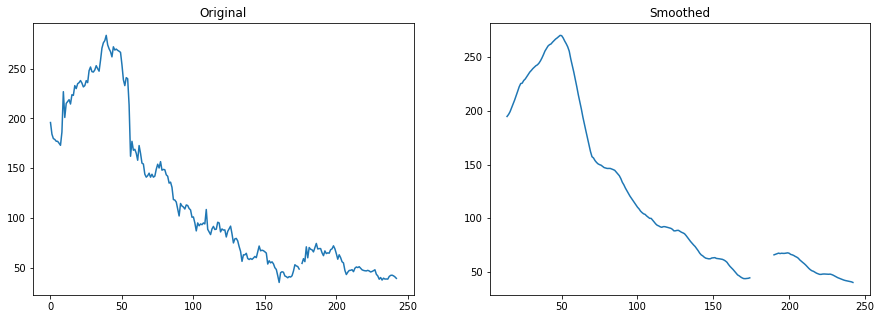

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize = (15,5));
axes[0].plot('Ticks','Open', data=a);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Rolling Mean', data = a );
axes[1].set_title('Smoothed');